In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras as k
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/Amazon Sales data (1).csv')

In [4]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
#checking the datatypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [9]:
#converting 'Order Date' and 'Ship Date' to datetime datatype
df['Order Date']=pd.to_datetime(df['Order Date'], format='%m/%d/%y')
df['Ship Date']=pd.to_datetime(df['Ship Date'], format='%m/%d/%y')

In [10]:
df.shape

(100, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [12]:
#now we will export this updated file so that we can use it for analysis
df.to_csv('amazon_sales_data.csv', index=False)

In [13]:
df['Region'] = df['Region'].astype(str)
df['Country'] = df['Country'].astype(str)
df['Item Type'] = df['Item Type'].astype(str)
df['Sales Channel'] = df['Sales Channel'].astype(str)
df['Order Priority'] = df['Order Priority'].astype(str)

In [14]:
df[['Units Sold', 'Unit Price',	'Unit Cost', 'Total Revenue', 'Total Cost',	'Total Profit']].describe()


,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [15]:
# Adding extra column to dataframe which contain only month, year and month with year
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Date MonthYear'] = df['Order Date'].dt.strftime('%Y-%m')
df = df.drop(columns=['Order Date'])

In [16]:
df.isnull().sum()

Region                  0
Country                 0
Item Type               0
Sales Channel           0
Order Priority          0
Order ID                0
Ship Date               0
Units Sold              0
Unit Price              0
Unit Cost               0
Total Revenue           0
Total Cost              0
Total Profit            0
Order Month             0
Order Year              0
Order Date MonthYear    0
dtype: int64

In [17]:
# Display total values of all country
pd.set_option('display.max_rows', None)
df['Country'].value_counts()

Country
The Gambia                          4
Sierra Leone                        3
Sao Tome and Principe               3
Mexico                              3
Australia                           3
Djibouti                            3
Switzerland                         2
Myanmar                             2
Norway                              2
Turkmenistan                        2
Cameroon                            2
Bulgaria                            2
Honduras                            2
Azerbaijan                          2
Libya                               2
Rwanda                              2
Mali                                2
Gabon                               1
Belize                              1
Haiti                               1
Lithuania                           1
San Marino                          1
United Kingdom                      1
Austria                             1
Fiji                                1
Madagascar                          1
Cote

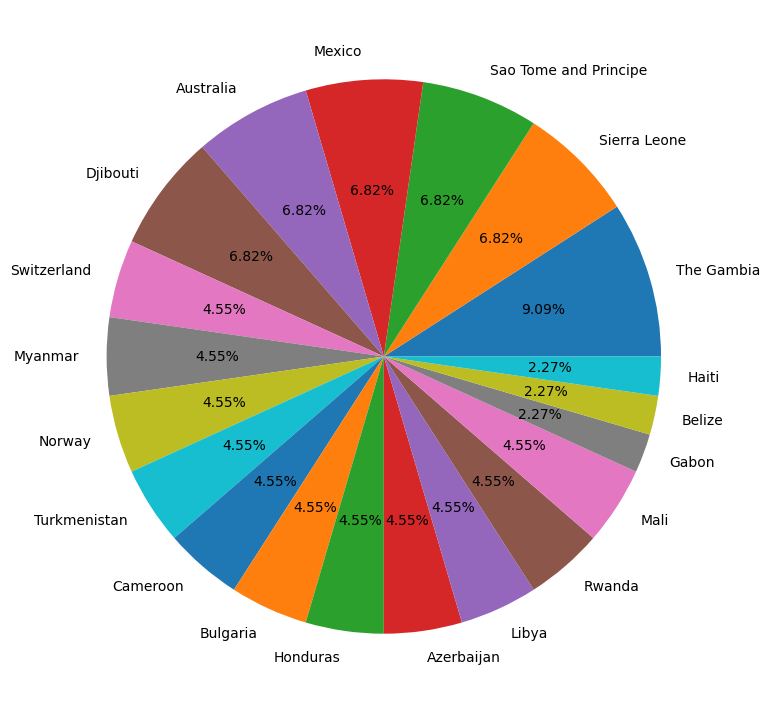

In [18]:
import matplotlib.pyplot as plt
country_names = df.Country.value_counts().index
country_val = df.Country.value_counts().values
# Pie Chart for top 20 country
fig,ax = plt.subplots(figsize=(9,9))
ax.pie(country_val[:20],labels=country_names[:20],autopct='%1.2f%%')
plt.show()

Exploratory Data Analysis

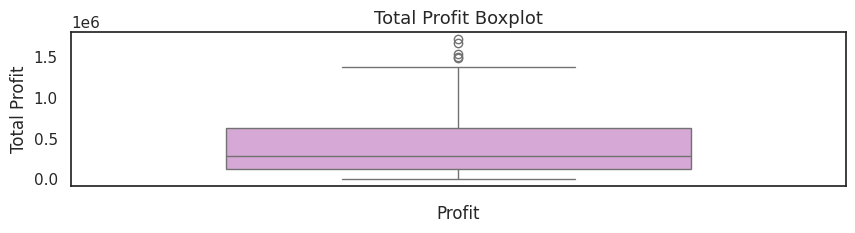

In [19]:
import matplotlib.pyplot as plt
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(df['Total Profit'], color="plum", width=.6)

plt.title('Total Profit Boxplot', fontsize=13)
plt.xlabel('Profit')
plt.show()

In [20]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 2rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [21]:
outliers = detect_outliers(df, df["Total Profit"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                               Europe
Coun

In [22]:
# Print rows where outlier is present for the Total Profit column value
print(outliers)

[13, 30, 33, 46, 74, 79, 93]


In [23]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Profit column of dataframe data ")

The list has 7 outliers in Total Profit column of dataframe data 


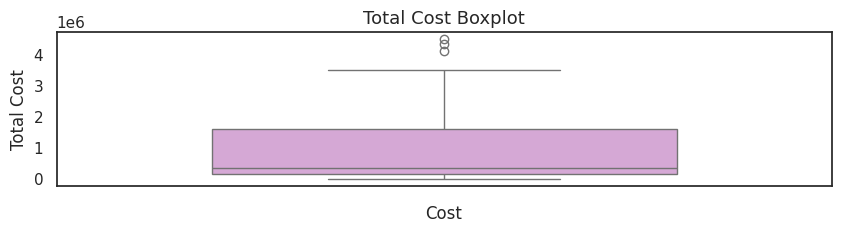

In [24]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(df['Total Cost'], color="plum", width=.6)

plt.title('Total Cost Boxplot', fontsize=13)
plt.xlabel('Cost')
plt.show()

In [25]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 3rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [26]:
outliers = detect_outliers(df, df["Total Cost"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                                 Asia
Coun

In [27]:
# Print rows where outlier is present for the Total Cost column value
print(outliers)

[13, 33, 38, 68, 75]


In [28]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Cost column of dataframe data ")

The list has 5 outliers in Total Cost column of dataframe data 


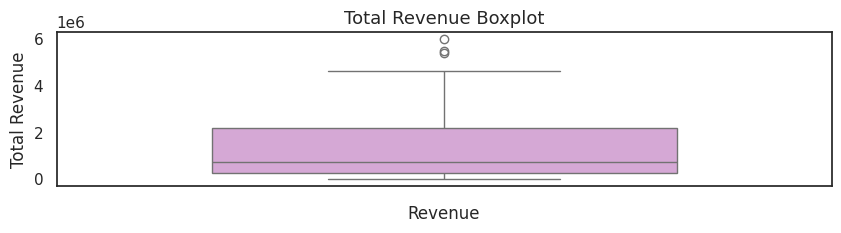

In [29]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(df['Total Revenue'], color="plum", width=.6)

plt.title('Total Revenue Boxplot', fontsize=13)
plt.xlabel('Revenue')
plt.show()

In [30]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 3rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [31]:
outliers = detect_outliers(df, df["Total Revenue"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                                 Asia
Coun

In [32]:
# Print rows where outlier is present for the Total Revenue column value
print(outliers)

[13, 33, 38, 68, 74, 75]


In [33]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Revenue column of dataframe data ")

The list has 6 outliers in Total Revenue column of dataframe data 


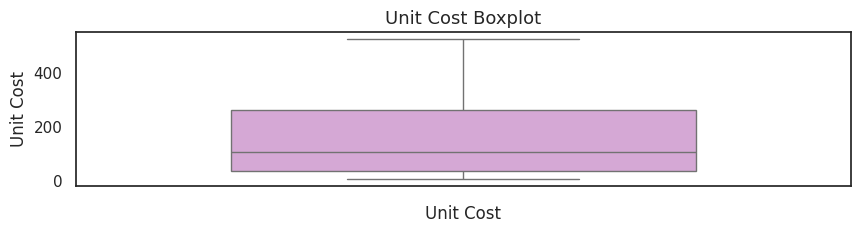

In [34]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(df['Unit Cost'], color="plum", width=.6)
plt.title('Unit Cost Boxplot', fontsize=13)
plt.xlabel('Unit Cost')
plt.show()

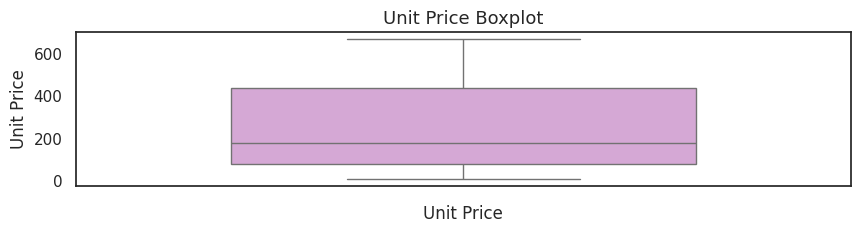

In [35]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(df['Unit Price'], color="plum", width=.6)
plt.title('Unit Price Boxplot', fontsize=13)
plt.xlabel('Unit Price')
plt.show()

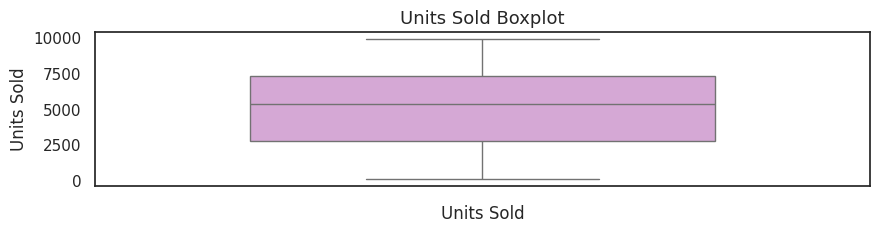

In [36]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(df['Units Sold'], color="plum", width=.6)

plt.title('Units Sold Boxplot', fontsize=13)
plt.xlabel('Units Sold')
plt.show()

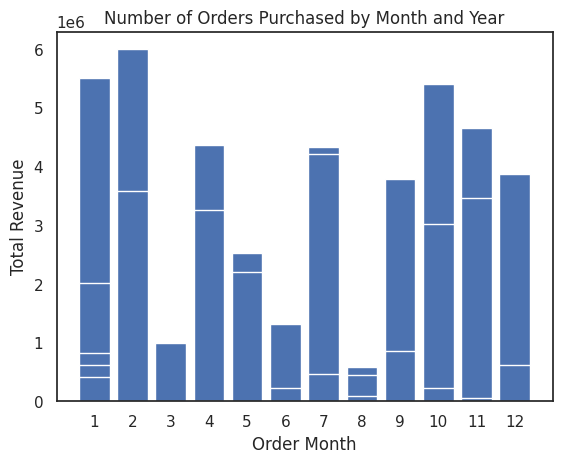

In [37]:
# Creating a bar chart for Total Revenue and Order Month
plt.bar(df['Order Month'], df['Total Revenue'])

# Set the chart title and axis labels
plt.title('Number of Orders Purchased by Month and Year')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')

# Rotate the x-axis labels for better readability

# Display the chart
plt.show()

Text(0.5, 1.0, 'Profit per year')

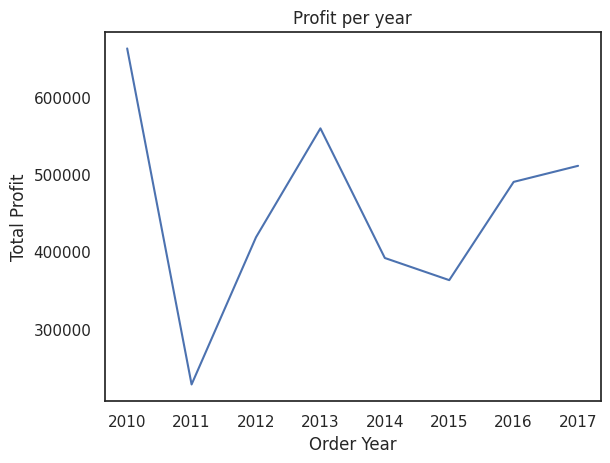

In [38]:
# Plot line graph of Total Profit and Order Year
df.groupby('Order Year')['Total Profit'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.title('Profit per year')

In [39]:
# Calculating the total revenue for each group with respect to Item Type and then sorting then in descending order
revenue_by_category = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
revenue_by_category

Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total Revenue, dtype: float64

In [40]:
# Calculating the total profit for each group with respect to Item Type and then sorting then in descending order
profit_by_category = df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)
profit_by_category

Item Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total Profit, dtype: float64

In [41]:
# Calculating correlation of 'Total Revenue', 'Total Cost' and 'Total Profit' columns present in dataframe
print(df[['Total Revenue', 'Total Cost', 'Total Profit']].corr())

               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000    0.983928      0.897327
Total Cost          0.983928    1.000000      0.804091
Total Profit        0.897327    0.804091      1.000000


Predictive Analytics

In [42]:
# Label Encoding of Item Type, Sales Channel and Order Priority for model training
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Item Type"] = le.fit_transform(df["Item Type"])
df["Sales Channel"] = le.fit_transform(df["Sales Channel"])
df["Order Priority"] = le.fit_transform(df["Order Priority"])

In [43]:
# Drop columns Region, Country, Order Date MonthYear, Order ID and Ship Date
df = df.drop("Region", axis=1)
df = df.drop("Country", axis=1)
df = df.drop("Order Date MonthYear", axis=1)
df = df.drop("Order ID", axis=1)
df = df.drop("Ship Date", axis=1)

In [43]:
df.head()

,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
0,0,0,1,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010
1,2,1,0,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012
2,8,0,2,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014
3,5,1,0,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014
4,8,0,2,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013


Using Pycaret library

PyCaret is an open-source, low-code machine learning library in Python that allows users to quickly and easily build, compare, and deploy machine learning models on structured and tabular data.

Some of the key features of PyCaret include:
*   Preprocessing and feature engineering functions
*   Automatic model selection and hyperparameter tuning
*   Interpretation tools for model results
*   Support for a wide range of machine learning algorithms
*   Deployment of models to production










In [44]:
# Storing df dataframe in df_auto_ml for performing (Auto ML) Pycaret library
df_auto_ml = df

In [45]:
# Install pycaret dependency
!pip install --pre pycaret

In [46]:
# Import * to train dataframe on multiple regression algorithm
from pycaret.regression import *

In [47]:
# Set target value
reg = setup(data=df_auto_ml,target='Total Profit')

,Description,Value
0,Session id,2724
1,Target,Total Profit
2,Target type,Regression
3,Original data shape,"(100, 11)"
4,Transformed data shape,"(100, 11)"
5,Transformed train set shape,"(70, 11)"
6,Transformed test set shape,"(30, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [48]:
# Comparing multiple models
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0527,0.0078,0.0739,1.0000,0.0000,0.0000,1.1670
ridge,Ridge Regression,0.0525,0.0078,0.0738,1.0000,0.0000,0.0000,0.0620
lar,Least Angle Regression,0.0531,0.0079,0.0746,1.0000,0.0000,0.0000,0.0550
llar,Lasso Least Angle Regression,0.0458,0.0068,0.0662,1.0000,0.0000,0.0000,0.0570
br,Bayesian Ridge,0.0527,0.0078,0.0740,1.0000,0.0000,0.0000,0.0820
par,Passive Aggressive Regressor,145.2392,60115.6755,220.1320,1.0000,0.0012,0.0008,0.0590
huber,Huber Regressor,0.0591,0.0087,0.0782,1.0000,0.0000,0.0000,0.1000
en,Elastic Net,4591.4729,44701189.3490,5937.6903,0.9998,0.2480,0.3912,0.0700
lasso,Lasso Regression,4865.8827,50547513.2148,6274.8486,0.9997,0.2540,0.4067,0.0700
et,Extra Trees Regressor,63973.6498,9194712358.8046,86453.0891,0.9405,0.4022,0.4693,0.3400


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

In [49]:
# Using Lasso Least Angle Regression algorithm to train model
llar_model = create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0181,0.0005,0.0213,1.0000,0.0000,0.0000
1,0.0461,0.0082,0.0908,1.0000,0.0000,0.0000
2,0.0129,0.0002,0.0147,1.0000,0.0000,0.0000
3,0.0734,0.0118,0.1086,1.0000,0.0000,0.0000
4,0.0246,0.0008,0.0283,1.0000,0.0000,0.0000
5,0.0359,0.0022,0.0467,1.0000,0.0000,0.0000
6,0.0419,0.0030,0.0549,1.0000,0.0000,0.0000
7,0.0677,0.0120,0.1093,1.0000,0.0000,0.0000
8,0.0150,0.0003,0.0167,1.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
# Tuning the model for better performance
tuned_llar_model = tune_model(llar_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0173,0.0004,0.0209,1.0000,0.0000,0.0000
1,0.0459,0.0082,0.0907,1.0000,0.0000,0.0000
2,0.0124,0.0002,0.0153,1.0000,0.0000,0.0000
3,0.0736,0.0119,0.1089,1.0000,0.0000,0.0000
4,0.0243,0.0008,0.0279,1.0000,0.0000,0.0000
5,0.0389,0.0023,0.0484,1.0000,0.0000,0.0000
6,0.0436,0.0033,0.0571,1.0000,0.0000,0.0000
7,0.0671,0.0119,0.1092,1.0000,0.0000,0.0000
8,0.0152,0.0003,0.0170,1.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


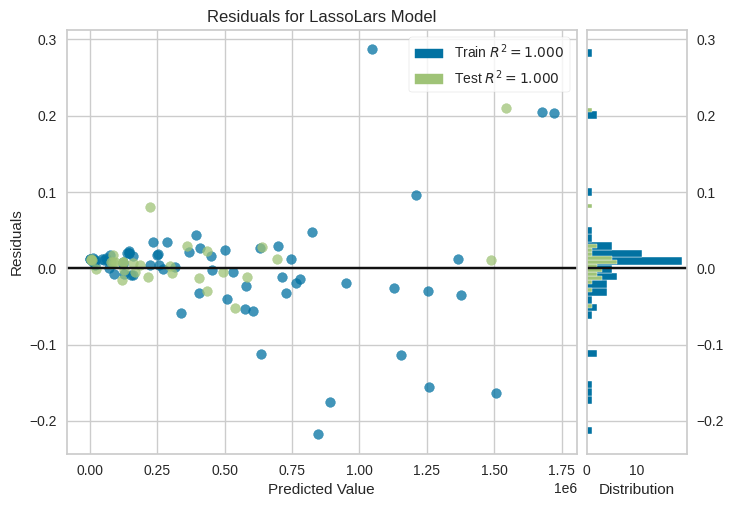

In [51]:
# Plot residuals for Lasso Least Angle Regression based trained model
plot_model(tuned_llar_model)

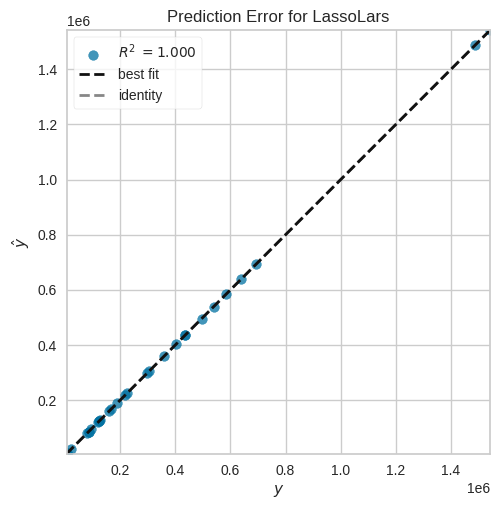

In [52]:
# Plot prediction error plot for Lasso Least Angle Regression based trained model
plot_model(tuned_llar_model, plot="error")

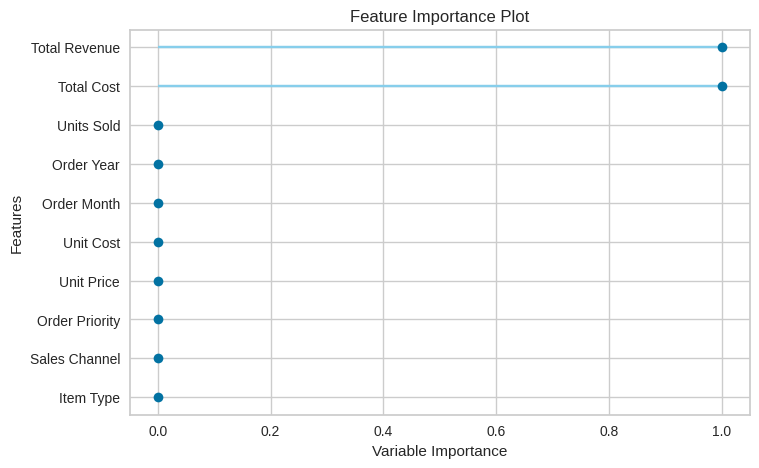

In [53]:
# Plot feature importance plot
plot_model(tuned_llar_model,plot='feature')

In [54]:
# Predicting total profit using Lasso Least Angle Regression based trained model
predict_model(tuned_llar_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,0.0217,0.0019,0.0440,1.0000,0.0000,0.0000


,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Month,Order Year,Total Profit,prediction_label
85,9,0,2,6422,81.730003,56.669998,5.248701e+05,3.639348e+05,2,2012,1.609353e+05,1.609353e+05
14,9,0,0,4901,81.730003,56.669998,4.005587e+05,2.777397e+05,2,2014,1.228191e+05,1.228191e+05
57,4,0,1,2847,437.200012,263.329987,1.244708e+06,7.497005e+05,2,2015,4.950079e+05,4.950079e+05
47,9,1,3,273,81.730003,56.669998,2.231229e+04,1.547091e+04,12,2010,6.841380e+03,6.841391e+03
11,3,0,1,4168,109.279999,35.840000,4.554790e+05,1.493811e+05,8,2014,3.060979e+05,3.060979e+05
69,3,0,2,7342,109.279999,35.840000,8.023338e+05,2.631373e+05,4,2015,5.391965e+05,5.391964e+05
94,1,0,0,8156,47.450001,31.790001,3.870022e+05,2.592792e+05,2,2011,1.277230e+05,1.277230e+05
42,2,0,1,2117,205.699997,117.110001,4.354669e+05,2.479219e+05,6,2012,1.875450e+05,1.875450e+05
4,8,0,2,5062,651.210022,524.960022,3.296425e+06,2.657348e+06,2,2013,6.390775e+05,6.390775e+05
51,5,1,2,9606,9.330000,6.920000,8.962398e+04,6.647352e+04,8,2013,2.315046e+04,2.315046e+04


Implement Linear Regression


In [55]:
# Select the independent variables and target variable
X = df[['Item Type', 'Sales Channel', 'Order Priority', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Order Month', 'Order Year']]
y = df['Total Profit']

In [56]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [58]:
# Performing fit transform on X_train dataframe
X_train = scaler.fit_transform(X_train)

In [59]:
# Performing transform on X_test dataframe
X_test = scaler.transform(X_test)

In [60]:
# Applying Linear Regression on X_train and y_train
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [61]:
# Calculating mean squared error
mse = cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=5)

In [62]:
np.mean(mse)

-6.727059692031499e-19

In [63]:
## prediction
reg_pred = regression.predict(X_test)

In [64]:
reg_pred

array([2.25246900e+05, 4.36446250e+05, 6.32512500e+05, 8.52235800e+04,
       4.35499200e+05, 5.03358750e+05, 1.22686500e+05, 7.47939490e+05,
       7.82812000e+03, 9.51410500e+05, 6.34745900e+05, 1.50588807e+06,
       7.66835040e+05, 1.36727250e+06, 1.19685000e+05, 6.39077500e+05,
       1.46875140e+05, 2.35601160e+05, 6.06834720e+05, 5.32525000e+04,
       2.55718080e+05, 1.25802000e+03, 1.30091800e+04, 1.87545030e+05,
       5.39196480e+05, 1.22865120e+05, 7.55559000e+04, 1.51034700e+04,
       5.84073870e+05, 8.99040600e+04])

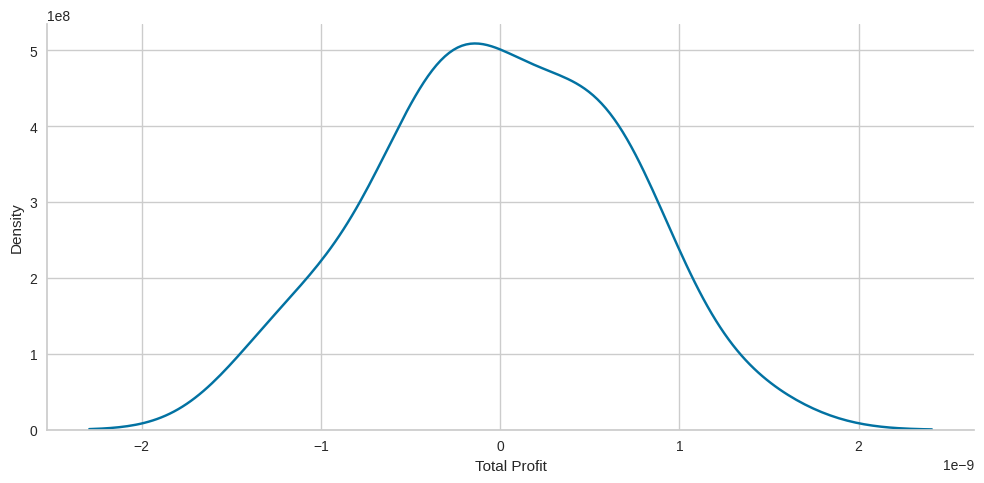

In [65]:
# Creating kernel density estimate plot
import seaborn as sns
sns.displot(reg_pred - y_test,kind='kde', height=5, aspect=2)

In [66]:
# Finding Accuracy percentage on the bases of r2 score
from sklearn.metrics import r2_score
score = r2_score(reg_pred,y_test)

# Calculate the percentage of accuracy
accuracy_pct = score * 100

print("Accuracy: {:.2f}%".format(accuracy_pct))

# SVM AND LR to apply

Accuracy: 100.00%


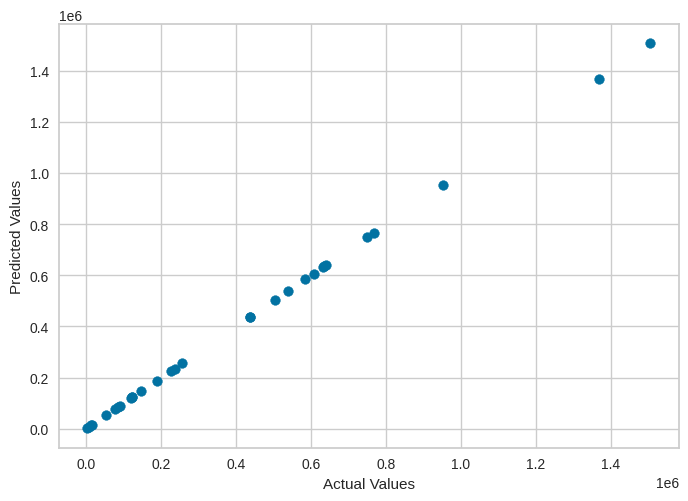

In [67]:
# Plot the predicted values against the actual values to visualize how well the model is fitting the data.
import matplotlib.pyplot as plt

plt.scatter(y_test, reg_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [68]:
# Calculate the mean squared error (MSE) or root mean squared error (RMSE) to quantify the model's performance.

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, reg_pred)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 4.2851929643772975e-19
RMSE: 6.546138529222627e-10


In [69]:
import plotly.graph_objs as go
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a linear regression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate the R-squared score
r2 = reg.score(X_test, y_test)

# Create a copy of the X_train numpy array with modified column names
X_train_df = pd.DataFrame(X_train, columns=['Item Type', 'Sales Channel', 'Order Priority', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Order Month', 'Order Year'])

# Extract the coefficients of the linear regression model
coef = reg.coef_

# Create a DataFrame with the coefficients and feature names
feature_importances = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': coef})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Create a bar chart of the feature importances using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=feature_importances['Feature'], y=feature_importances['Importance']))
fig.update_layout(title='Feature Importance (R-squared = {:.2f})'.format(r2),
                  xaxis_title='Feature',
                  yaxis_title='Importance',
                  xaxis_tickangle=-45)
fig.show()